# Fractional Brownian Motion Parameter Estimation Using Variance Aggregation

Consider a time series of $n$, identically distributed samples,</br>

$
\begin{align}
X_1, X_2,X_3,\ldots,X_n
\end{align}
$

Divide the series into $d$ smaller series of length $m$ where $md=n$.\ and let,</br>
$k = 0,1,2,3,\ldots,d-1$ and define the aggregated sum by,

$
\begin{align}
X_k^m &= \frac{1}{m}\left( X_{km+1} + X_{km+2} + \cdots + X_{km+m-1} + X_{km+m} \right) \\
&= \frac{1}{m} \left( X_{km+1} + \cdots + X_{(k+1)m} \right) \\
&= \frac{1}{m} \sum_{i=km+1}^{(k+1)m} X_i
\end{align}
$

The aggregated mean is given by,

$
\begin{align}
\text{E}[X^m] &= \frac{1}{d}\sum_{i=1}^d X_i^m \\
&= \frac{1}{dm} \sum_{i=1}^d \sum_{j=im+1}^{(k+1)i} X_j \\
&= \frac{1}{n} \sum_{i=1}^n X_i
\end{align}
$

and the aggregated variance by,

$
\begin{align}
\text{Var}[X^m] = \frac{1}{d} \sum_{i=1}^d\left( X^m_i - \text{E}[X^m] \right)^2
\end{align}
$

This method makes use of the self similarity of fractional brownian motion. Consider the aggregated process,

$
\begin{align}
X_0^m = \frac{1}{m} \sum_{i=1}^m X_i
\end{align}
$

From self similarity of fractional brownian motion,

$
\begin{align}
X_{ai} \sim a^H X_i
\end{align}
$

Since the distribution of the sum of Gaussian random variables is the distribution of the last it follows that,</br> 

$
\begin{align}
X_0^m \sim \frac{1}{m} X_m \sim \frac{m^H}{m} X_1 = m^{H-1} X_1
\end{align}
$

For fractional brownian noise,

$
\begin{align}
&\text{E}[\Delta Z^H_t] = 0 \\
&\text{Var}[\Delta Z^H_t] = \Delta t^{2H}
\end{align}
$

$X_1$ is a single increment of brownian motion it follows that,

$
\begin{align}
\text{Var}[X_1] = \Delta t^{2H} = \sigma^2
\end{align}
$

so,

$
\begin{align}
\text{Var}[X_0^m] = \text{Var}[m^{H-1} X_1] = m^{2(H-1)}\text{Var}[X_1] = \sigma^2 m^{2(H-1)}
\end{align}
$

From stationarity of it follows that,

$
\begin{align}
\text{Var}[X_k^m] = \sigma^2 m^{2(H-1)}
\end{align}
$

It follows that $H$ can be determined by using OLS on $\text{Var}[X_k^m]$ as a function of $m$.

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib import (Func, Source, PlotType, Est)
from lib import (curve, stack, single_var)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
Δt = 1.0
npts = 2**10
nagg = 100
m_vals = [1, 10, 50]

def agg_comparison(fbm, H):
    title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
    labels = [f"m={m}" for m in m_vals]
    params = [{"m": m} for m in m_vals]
    m_scan = Func.AGG.apply_parameter_scan(fbm, *params)
    stack(m_scan, ylim=[-3.5, 3.5], title=title, labels=labels)

## Simulation $H=0.8$

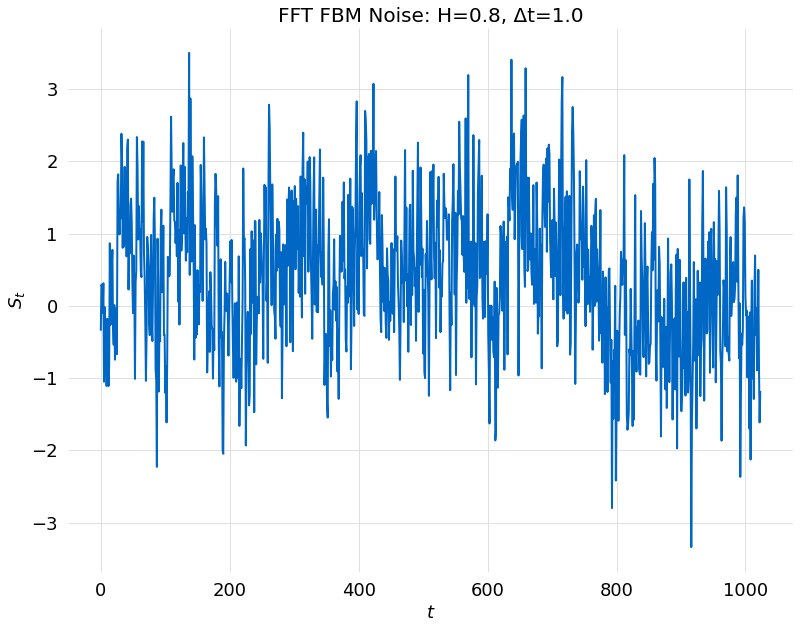

In [3]:
H = 0.8
fbm = Source.FBM_NOISE_FFT.create(H=H, npts=npts)
curve(fbm)

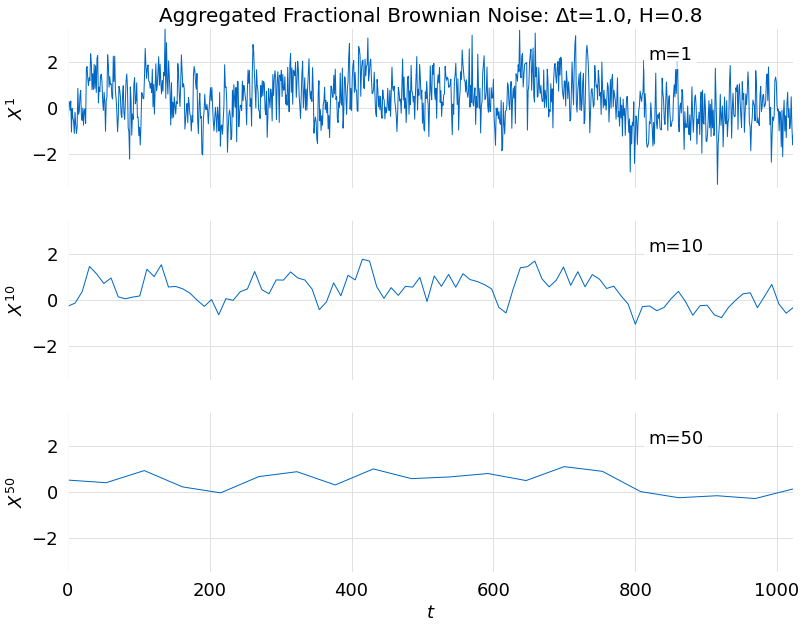

In [4]:
agg_comparison(fbm, H)

In [5]:
agg_var = Func.AGG_VAR.apply(fbm, m_max=nagg, npts=nagg)
agg_var.attrs

{'SourceType': <Source.FBM_NOISE_FFT: 'FBM_NOISE_FFT'>,
 'SourceName': 'FFT-FBM-Noise-Simulation-79409db9-5713-4617-a8b7-46787b910fb8',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '04/06/2022 12:14:15',
 'Type': <Func.AGG_VAR: 'AGG_VAR'>,
 'Name': 'TIME_SERIES-9db97e57-7bbc-4f2f-bb09-fede0faadd27',
 'SchemaIterations': None,
 'FBM_NOISE_FFT': {'npts': 1024,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'H': 0.8, 'Δt': 1.0},
  'Description': 'FFT FBM Noise',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'AGG_VAR': {'npts': 100,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'npts': 100, 'm_max': 100, 'm_min': 1.0},
  'Description': 'Aggregated Variance',
  'ylabel': '$Var(X^m)$',
  'xlabel': '$m$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  '

In [6]:
results = Est.AGG_VAR.perform(agg_var)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   S(t)   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     5431.
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           1.23e-87
Time:                        12:14:15   Log-Likelihood:                 199.19
No. Observations:                 100   AIC:                            -394.4
Df Residuals:                      98   BIC:                            -389.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0489      0.007      7.384      0.000       0.036       0.062
t             -0.4215      0.006    -73.696      0.000      -0.433      -0.410
==============================================================================
Omnibus:                        4.502   Durbin-Watson:                   1.022
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                5.810
Skew:                           0.069   Prob(JB):                       0.0547
Kurtosis:                       4.173   Cond. No.                         3.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
agg_var.attrs

{'SourceType': <Source.FBM_NOISE_FFT: 'FBM_NOISE_FFT'>,
 'SourceName': 'FFT-FBM-Noise-Simulation-79409db9-5713-4617-a8b7-46787b910fb8',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '04/06/2022 12:14:15',
 'Type': <Func.AGG_VAR: 'AGG_VAR'>,
 'Name': 'TIME_SERIES-9db97e57-7bbc-4f2f-bb09-fede0faadd27',
 'SchemaIterations': None,
 'FBM_NOISE_FFT': {'npts': 1024,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'H': 0.8, 'Δt': 1.0},
  'Description': 'FFT FBM Noise',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'AGG_VAR': {'npts': 100,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'npts': 100, 'm_max': 100, 'm_min': 1.0},
  'Description': 'Aggregated Variance',
  'ylabel': '$Var(X^m)$',
  'xlabel': '$m$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {'AGG_V

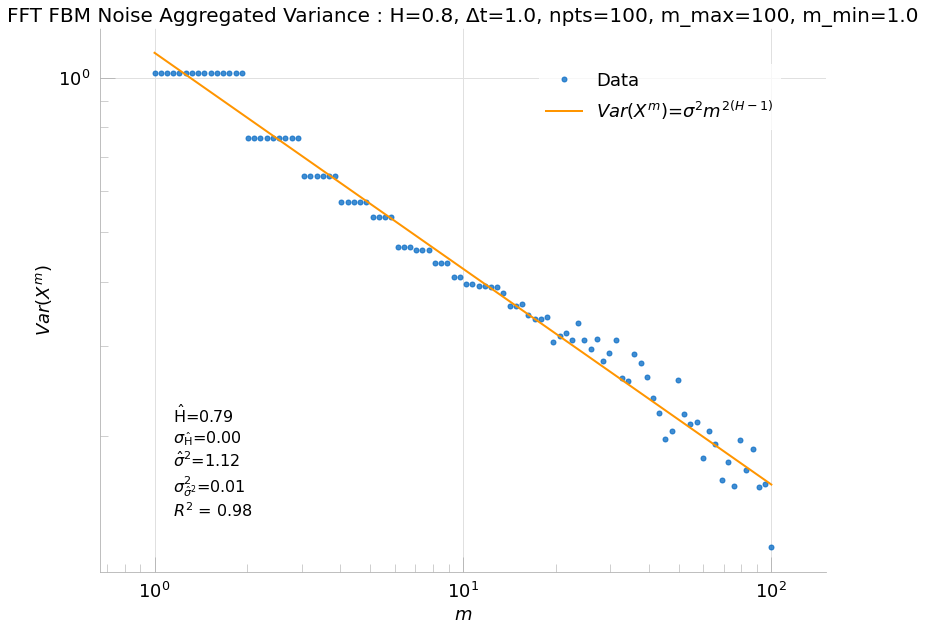

In [8]:
single_var(agg_var, est_type=Est.AGG_VAR)

## Simulation $H=0.6$

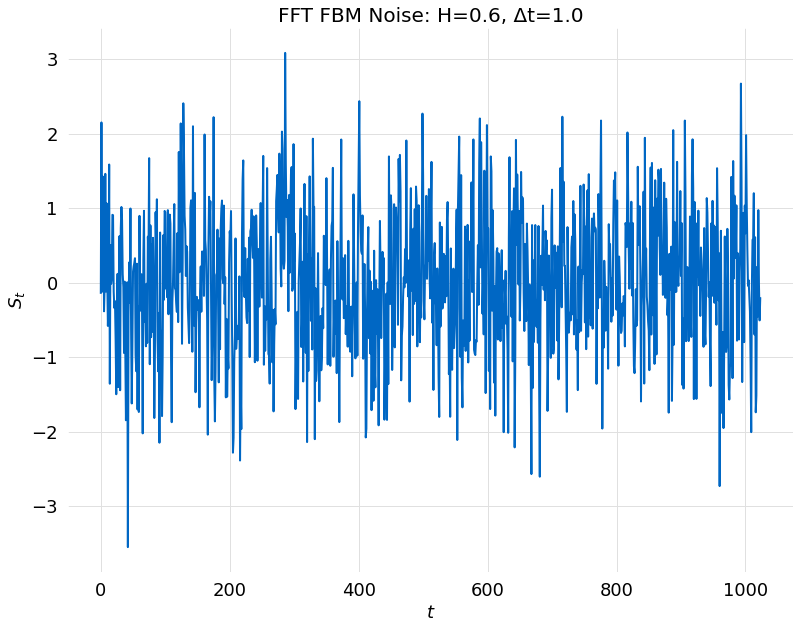

In [9]:
H = 0.6
fbm = Source.FBM_NOISE_FFT.create(H=H, npts=npts)
curve(fbm)

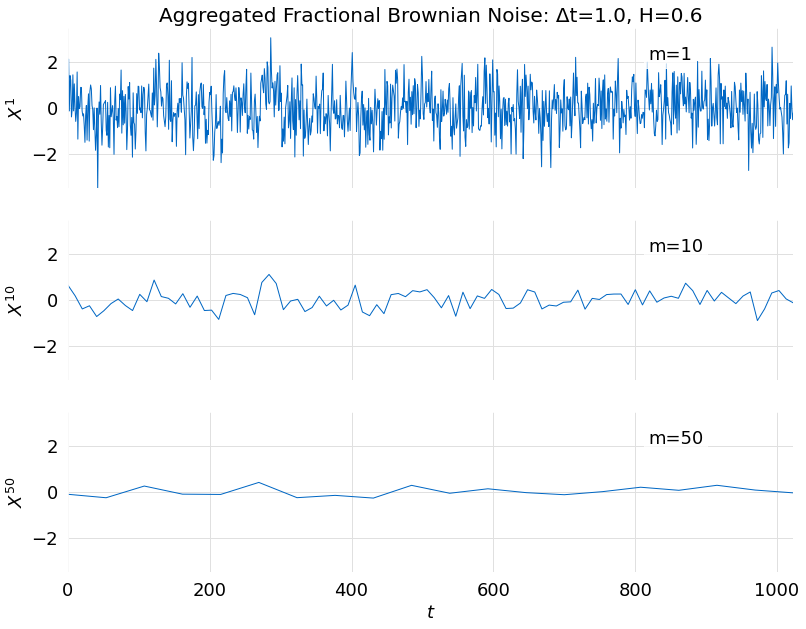

In [10]:
agg_comparison(fbm, H)

In [11]:
agg_var = Func.AGG_VAR.apply(fbm, m_max=nagg, npts=nagg)
agg_var.attrs

{'SourceType': <Source.FBM_NOISE_FFT: 'FBM_NOISE_FFT'>,
 'SourceName': 'FFT-FBM-Noise-Simulation-66557829-769d-4845-b8b8-fd1db4cc52a2',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '04/06/2022 12:14:16',
 'Type': <Func.AGG_VAR: 'AGG_VAR'>,
 'Name': 'TIME_SERIES-77500f1c-2750-4541-87c6-3ab6bf58a65a',
 'SchemaIterations': None,
 'FBM_NOISE_FFT': {'npts': 1024,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'H': 0.6, 'Δt': 1.0},
  'Description': 'FFT FBM Noise',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'AGG_VAR': {'npts': 100,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'npts': 100, 'm_max': 100, 'm_min': 1.0},
  'Description': 'Aggregated Variance',
  'ylabel': '$Var(X^m)$',
  'xlabel': '$m$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  '

In [12]:
results = Est.AGG_VAR.perform(agg_var)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   S(t)   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     7232.
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           1.22e-93
Time:                        12:14:16   Log-Likelihood:                 138.36
No. Observations:                 100   AIC:                            -272.7
Df Residuals:                      98   BIC:                            -267.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0764      0.012      6.280      0.000       0.052       0.101
t             -0.8936      0.011    -85.042      0.000      -0.914      -0.873
==============================================================================
Omnibus:                        0.634   Durbin-Watson:                   1.206
Prob(Omnibus):                  0.728   Jarque-Bera (JB):                0.734
Skew:                          -0.176   Prob(JB):                        0.693
Kurtosis:                       2.773   Cond. No.                         3.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
agg_var.attrs

{'SourceType': <Source.FBM_NOISE_FFT: 'FBM_NOISE_FFT'>,
 'SourceName': 'FFT-FBM-Noise-Simulation-66557829-769d-4845-b8b8-fd1db4cc52a2',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '04/06/2022 12:14:16',
 'Type': <Func.AGG_VAR: 'AGG_VAR'>,
 'Name': 'TIME_SERIES-77500f1c-2750-4541-87c6-3ab6bf58a65a',
 'SchemaIterations': None,
 'FBM_NOISE_FFT': {'npts': 1024,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'H': 0.6, 'Δt': 1.0},
  'Description': 'FFT FBM Noise',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'AGG_VAR': {'npts': 100,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'npts': 100, 'm_max': 100, 'm_min': 1.0},
  'Description': 'Aggregated Variance',
  'ylabel': '$Var(X^m)$',
  'xlabel': '$m$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {'AGG_V

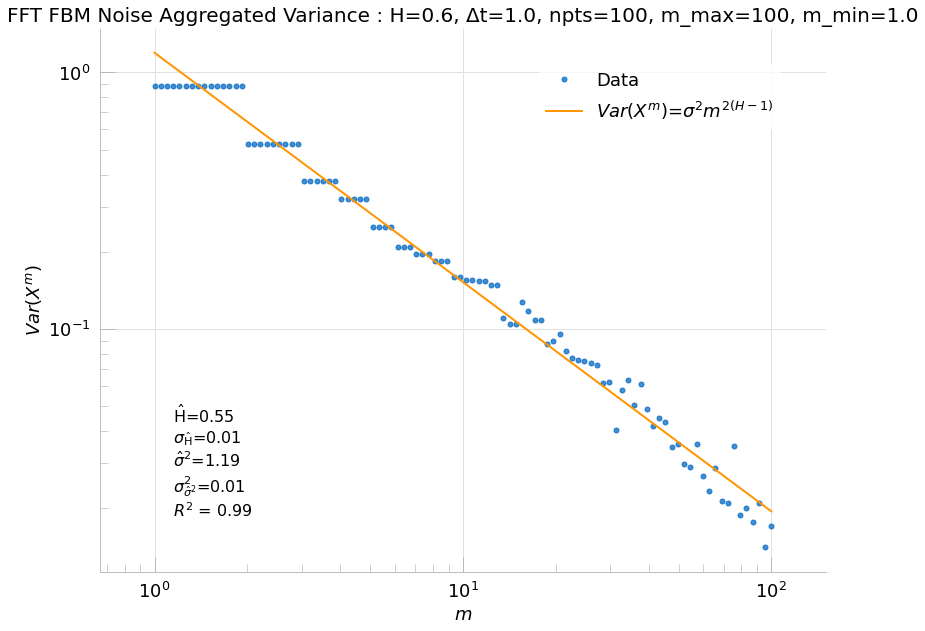

In [14]:
single_var(agg_var, est_type=Est.AGG_VAR)

## Simulation $H=0.4$

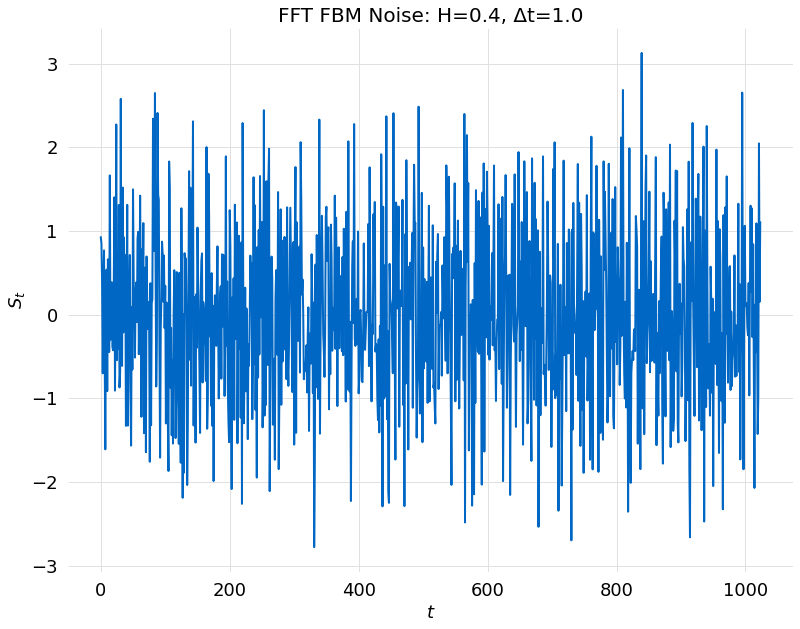

In [15]:
H = 0.4
fbm = Source.FBM_NOISE_FFT.create(H=H, npts=npts)
curve(fbm)

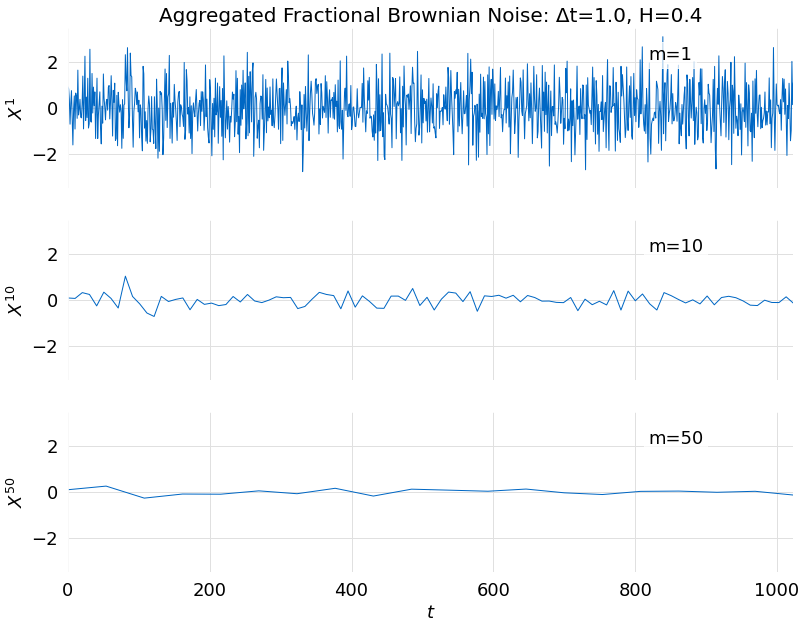

In [16]:
agg_comparison(fbm, H)

In [17]:
agg_var = Func.AGG_VAR.apply(fbm, m_max=nagg, npts=nagg)
agg_var.attrs

{'SourceType': <Source.FBM_NOISE_FFT: 'FBM_NOISE_FFT'>,
 'SourceName': 'FFT-FBM-Noise-Simulation-e8cda9bc-5a60-44e8-a6f5-d7f20eb3572b',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '04/06/2022 12:14:17',
 'Type': <Func.AGG_VAR: 'AGG_VAR'>,
 'Name': 'TIME_SERIES-3db53fbd-309d-4a89-95bc-43a792dadfe2',
 'SchemaIterations': None,
 'FBM_NOISE_FFT': {'npts': 1024,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'H': 0.4, 'Δt': 1.0},
  'Description': 'FFT FBM Noise',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'AGG_VAR': {'npts': 100,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'npts': 100, 'm_max': 100, 'm_min': 1.0},
  'Description': 'Aggregated Variance',
  'ylabel': '$Var(X^m)$',
  'xlabel': '$m$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  '

In [18]:
results = Est.AGG_VAR.perform(agg_var)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   S(t)   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     5981.
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           1.18e-89
Time:                        12:14:17   Log-Likelihood:                 97.034
No. Observations:                 100   AIC:                            -190.1
Df Residuals:                      98   BIC:                            -184.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1240      0.018      6.744      0.000       0.088       0.160
t             -1.2284      0.016    -77.337      0.000      -1.260      -1.197
==============================================================================
Omnibus:                       21.407   Durbin-Watson:                   0.679
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.113
Skew:                           1.128   Prob(JB):                     1.30e-06
Kurtosis:                       4.192   Cond. No.                         3.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
agg_var.attrs

{'SourceType': <Source.FBM_NOISE_FFT: 'FBM_NOISE_FFT'>,
 'SourceName': 'FFT-FBM-Noise-Simulation-e8cda9bc-5a60-44e8-a6f5-d7f20eb3572b',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '04/06/2022 12:14:17',
 'Type': <Func.AGG_VAR: 'AGG_VAR'>,
 'Name': 'TIME_SERIES-3db53fbd-309d-4a89-95bc-43a792dadfe2',
 'SchemaIterations': None,
 'FBM_NOISE_FFT': {'npts': 1024,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'H': 0.4, 'Δt': 1.0},
  'Description': 'FFT FBM Noise',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'AGG_VAR': {'npts': 100,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'npts': 100, 'm_max': 100, 'm_min': 1.0},
  'Description': 'Aggregated Variance',
  'ylabel': '$Var(X^m)$',
  'xlabel': '$m$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {'AGG_V

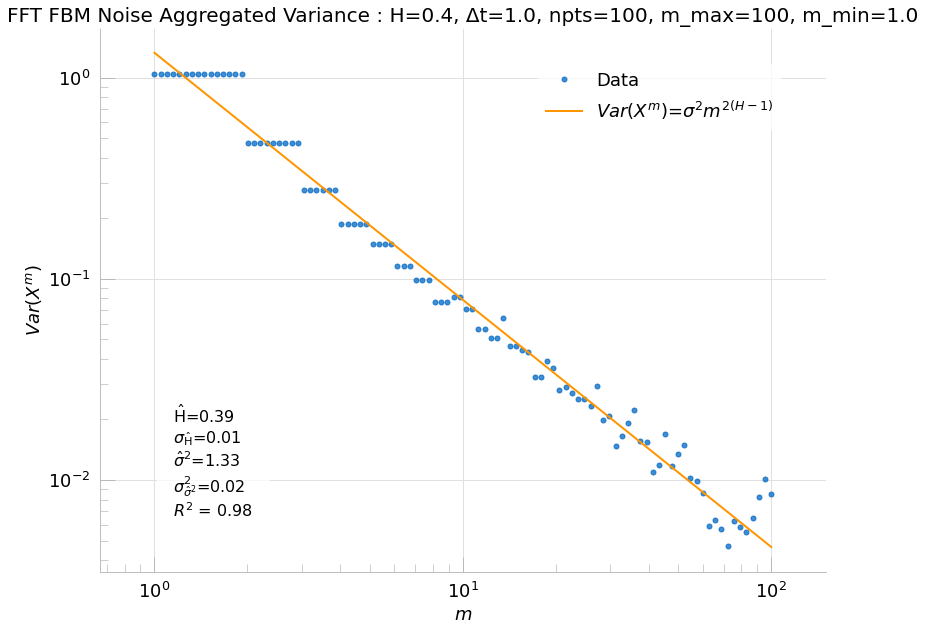

In [20]:
single_var(agg_var, est_type=Est.AGG_VAR)

## Simulation $H=0.2$

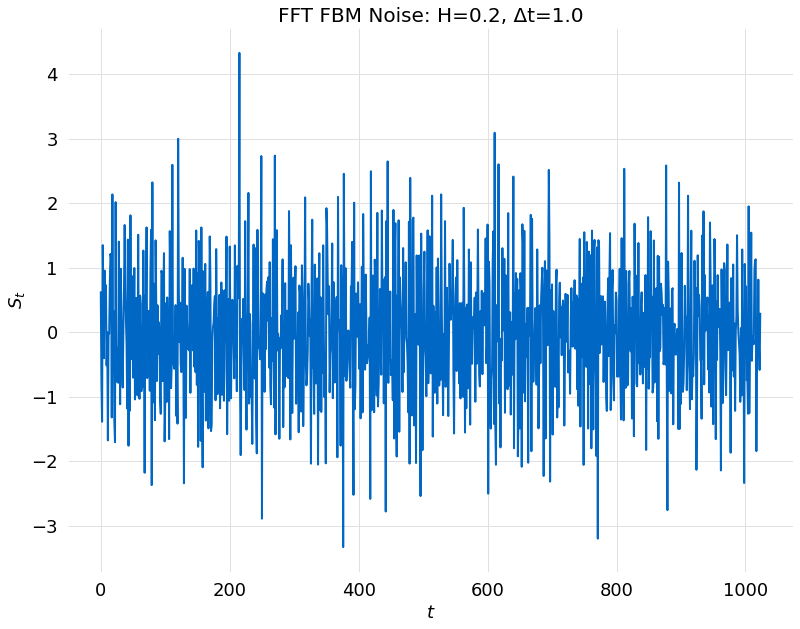

In [21]:
H = 0.2
fbm = Source.FBM_NOISE_FFT.create(H=H, npts=npts)
curve(fbm)

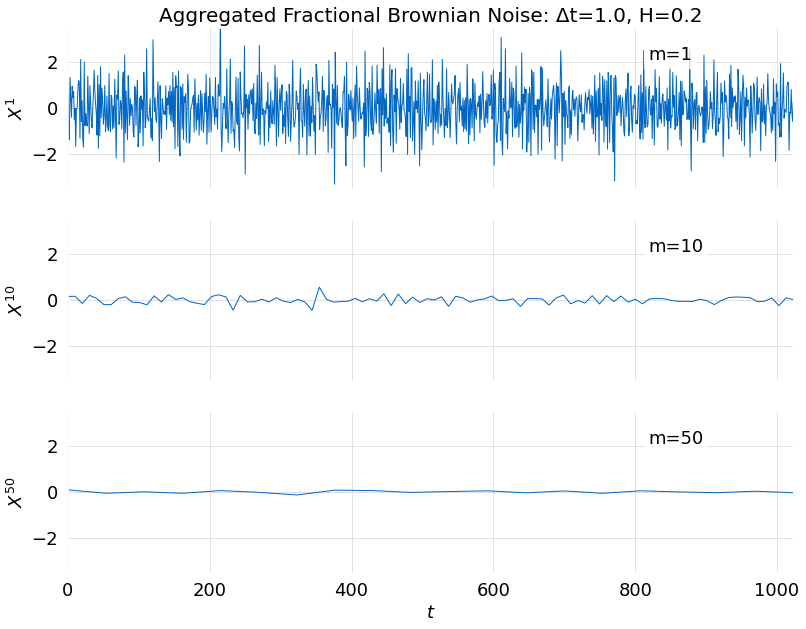

In [22]:
agg_comparison(fbm, H)

In [23]:
agg_var = Func.AGG_VAR.apply(fbm, m_max=nagg, npts=nagg)
agg_var.attrs

{'SourceType': <Source.FBM_NOISE_FFT: 'FBM_NOISE_FFT'>,
 'SourceName': 'FFT-FBM-Noise-Simulation-45eb15f4-ba37-4898-b022-d0312fe2dbb6',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '04/06/2022 12:14:18',
 'Type': <Func.AGG_VAR: 'AGG_VAR'>,
 'Name': 'TIME_SERIES-64117c87-26f2-48ff-8c6d-a42fc2af77d2',
 'SchemaIterations': None,
 'FBM_NOISE_FFT': {'npts': 1024,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'H': 0.2, 'Δt': 1.0},
  'Description': 'FFT FBM Noise',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'AGG_VAR': {'npts': 100,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'npts': 100, 'm_max': 100, 'm_min': 1.0},
  'Description': 'Aggregated Variance',
  'ylabel': '$Var(X^m)$',
  'xlabel': '$m$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  '

In [24]:
results = Est.AGG_VAR.perform(agg_var)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   S(t)   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     6069.
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           5.81e-90
Time:                        12:14:18   Log-Likelihood:                 59.788
No. Observations:                 100   AIC:                            -115.6
Df Residuals:                      98   BIC:                            -110.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2543      0.027      9.530      0.000       0.201       0.307
t             -1.7959      0.023    -77.906      0.000      -1.842      -1.750
==============================================================================
Omnibus:                        6.578   Durbin-Watson:                   1.538
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                7.121
Skew:                           0.391   Prob(JB):                       0.0284
Kurtosis:                       4.047   Cond. No.                         3.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
agg_var.attrs

{'SourceType': <Source.FBM_NOISE_FFT: 'FBM_NOISE_FFT'>,
 'SourceName': 'FFT-FBM-Noise-Simulation-45eb15f4-ba37-4898-b022-d0312fe2dbb6',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '04/06/2022 12:14:18',
 'Type': <Func.AGG_VAR: 'AGG_VAR'>,
 'Name': 'TIME_SERIES-64117c87-26f2-48ff-8c6d-a42fc2af77d2',
 'SchemaIterations': None,
 'FBM_NOISE_FFT': {'npts': 1024,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'H': 0.2, 'Δt': 1.0},
  'Description': 'FFT FBM Noise',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'AGG_VAR': {'npts': 100,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'npts': 100, 'm_max': 100, 'm_min': 1.0},
  'Description': 'Aggregated Variance',
  'ylabel': '$Var(X^m)$',
  'xlabel': '$m$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {'AGG_V

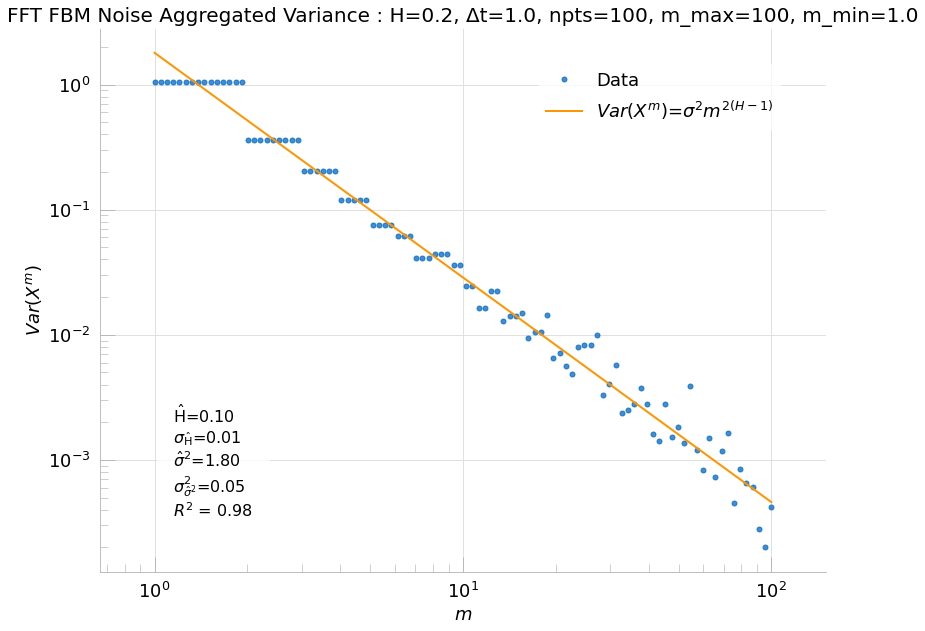

In [26]:
single_var(agg_var, est_type=Est.AGG_VAR)